In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import re
from matplotlib import pyplot as plt
import json
from folium import plugins
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm

# We import demographic data and clean and filter it

In [2]:
df = pd.read_csv('neighbourhood-profiles-2016-csv.csv')

In [3]:
dff = df.iloc[:,4:]

In [4]:
dff.head()

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,...,37,7,137,64,60,94,100,97,27,31
1,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177","26,918","15,434","19,348","17,671",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [5]:
df_f = dff.copy()
df_f.set_index('Characteristic', inplace = True)
df_f = df_f.transpose()

In [6]:
df_f.head()

Characteristic,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Children (0-14 years),...,External migrants,Total - Mobility status 5 years ago - 25% sample data,Non-movers,Movers,Non-migrants,Migrants,Internal migrants,Intraprovincial migrants,Interprovincial migrants,External migrants
City of Toronto,NaN,NaN,"2,731,571","2,615,060",4.50%,"1,179,057","1,112,929","4,334",630.2,"398,135",...,"59,945","2,556,120","1,516,110","1,040,015","639,060","400,950","184,120","141,135","42,985","216,835"
Agincourt North,129,No Designation,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41,"3,840",...,605,"27,490","18,865","8,610","5,445","3,170",880,735,135,"2,280"
Agincourt South-Malvern West,128,No Designation,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83,"3,075",...,490,"22,325","13,565","8,775","5,610","3,145",980,760,220,"2,170"
Alderwood,20,No Designation,"12,054","11,904",1.30%,"4,732","4,616","2,435",4.95,"1,760",...,70,"11,370","8,235","3,130","2,200",925,680,615,70,245
Annex,95,No Designation,"30,526","29,177",4.60%,"18,109","15,934","10,863",2.81,"2,360",...,835,"27,715","12,980","14,735","8,340","6,390","3,930","2,630","1,310","2,460"


In [7]:
df_f.head()

Characteristic,Neighbourhood Number,TSNS2020 Designation,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Children (0-14 years),...,External migrants,Total - Mobility status 5 years ago - 25% sample data,Non-movers,Movers,Non-migrants,Migrants,Internal migrants,Intraprovincial migrants,Interprovincial migrants,External migrants
City of Toronto,NaN,NaN,"2,731,571","2,615,060",4.50%,"1,179,057","1,112,929","4,334",630.2,"398,135",...,"59,945","2,556,120","1,516,110","1,040,015","639,060","400,950","184,120","141,135","42,985","216,835"
Agincourt North,129,No Designation,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41,"3,840",...,605,"27,490","18,865","8,610","5,445","3,170",880,735,135,"2,280"
Agincourt South-Malvern West,128,No Designation,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83,"3,075",...,490,"22,325","13,565","8,775","5,610","3,145",980,760,220,"2,170"
Alderwood,20,No Designation,"12,054","11,904",1.30%,"4,732","4,616","2,435",4.95,"1,760",...,70,"11,370","8,235","3,130","2,200",925,680,615,70,245
Annex,95,No Designation,"30,526","29,177",4.60%,"18,109","15,934","10,863",2.81,"2,360",...,835,"27,715","12,980","14,735","8,340","6,390","3,930","2,630","1,310","2,460"


### Now we make one table for the ages and incomes for every neighbourhood

In [8]:
tor_age_inc = df_f[['Neighbourhood Number','Population, 2016','Population, 2011','Total private dwellings','Population density per square kilometre','Youth (15-24 years)','Working Age (25-54 years)','Pre-retirement (55-64 years)','Census families in private households by family size','  2 persons','  3 persons','  4 persons','  5 or more persons','  Couples without children','Total - Income statistics in 2015 for private households by household size - 100% data','  Median total income of households in 2015 ($)','  Median after-tax income of households in 2015 ($)']]

In [9]:
tor_demo = tor_age_inc.loc[:, ~tor_age_inc.columns.duplicated()]

In [10]:
tor_demo.fillna(0, inplace = True)
tor_demo.head()

c:\users\laptop\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Characteristic,Neighbourhood Number,"Population, 2016","Population, 2011",Total private dwellings,Population density per square kilometre,Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Census families in private households by family size,2 persons,3 persons,4 persons,5 or more persons,Couples without children,Total - Income statistics in 2015 for private households by household size - 100% data,Median total income of households in 2015 ($),Median after-tax income of households in 2015 ($)
City of Toronto,0,"2,731,571","2,615,060","1,179,057","4,334","340,270","1,229,555","336,670","718,755","333,425","175,720","146,580","97,245","250,085","1,112,930","65,829","58,264"
Agincourt North,129,"29,113","30,279","9,371","3,929","3,705","11,305","4,230",8430,2370,1995,1750,1645,2520,"9,120",0,0
Agincourt South-Malvern West,128,"23,757","21,988","8,535","3,034","3,360","9,965","3,265",6650,2325,1680,1335,1175,2095,"8,130",0,0
Alderwood,20,"12,054","11,904","4,732","2,435","1,235","5,220","1,825",3480,1440,885,795,390,1175,"4,620",0,0
Annex,95,"30,526","29,177","18,109","10,863","3,750","15,040","3,480",6710,5220,1540,885,390,3830,"15,940",0,0


### We make a second table for the ethnicities of people in every neighbourhood

In [11]:
index_no = df_f.columns.get_loc('Total - Selected places of birth for the immigrant population in private households - 25% sample data')
index_no

1168

In [12]:
pl_of_birth = df_f.iloc[:,1169:1231]

In [13]:
pl_of_birth.head()

Characteristic,Americas,Brazil,Colombia,El Salvador,Guyana,Haiti,Jamaica,Mexico,Peru,Trinidad and Tobago,...,Pakistan,Philippines,Haiti,Sri Lanka,Syria,Taiwan,Viet Nam,Other places of birth in Asia,Scottish,Oceania and other places of birth
City of Toronto,"212,010","7,025","8,715","6,955","34,490","1,850","45,075","7,225","3,870","19,640",...,"34,750","118,775",675,"52,900","5,575","7,695","30,580","52,450","256,250","3,780"
Agincourt North,"1,635",10,15,10,390,0,500,15,40,220,...,295,"1,180",0,"2,210",10,115,495,600,600,20
Agincourt South-Malvern West,"1,415",15,10,30,295,20,395,10,15,240,...,435,"1,030",15,"1,070",40,140,330,460,725,0
Alderwood,450,30,15,20,80,0,45,25,0,50,...,15,420,0,25,0,0,35,85,"1,720",10
Annex,"1,630",60,40,10,45,0,175,60,60,80,...,135,175,0,30,20,120,70,515,"5,225",85


#### Now we work on visualizing this data

We need to aggregate all African countries since that column appears to be missing

In [14]:
pl_of_birth['Africa'] = 0
africa = pl_of_birth[['    Algeria', '    Egypt',
       '    Ethiopia', '    Kenya', '    Morocco', '    Nigeria',
       '    Somalia', '    South Africa; Republic of',
       '    Other places of birth in Africa']]

for country in africa:
    africa[country] = africa[country].str.replace(',', '').astype(int)
    
pl_of_birth['Africa'] = africa.sum(axis = 1)

<ipython-input-14-8f3dbba3602d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_of_birth['Africa'] = 0
<ipython-input-14-8f3dbba3602d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa[country] = africa[country].str.replace(',', '').astype(int)
<ipython-input-14-8f3dbba3602d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [15]:
pl_of_birth.head()

Characteristic,Americas,Brazil,Colombia,El Salvador,Guyana,Haiti,Jamaica,Mexico,Peru,Trinidad and Tobago,...,Philippines,Haiti,Sri Lanka,Syria,Taiwan,Viet Nam,Other places of birth in Asia,Scottish,Oceania and other places of birth,Africa
City of Toronto,"212,010","7,025","8,715","6,955","34,490","1,850","45,075","7,225","3,870","19,640",...,"118,775",675,"52,900","5,575","7,695","30,580","52,450","256,250","3,780",77450
Agincourt North,"1,635",10,15,10,390,0,500,15,40,220,...,"1,180",0,"2,210",10,115,495,600,600,20,455
Agincourt South-Malvern West,"1,415",15,10,30,295,20,395,10,15,240,...,"1,030",15,"1,070",40,140,330,460,725,0,355
Alderwood,450,30,15,20,80,0,45,25,0,50,...,420,0,25,0,0,35,85,"1,720",10,95
Annex,"1,630",60,40,10,45,0,175,60,60,80,...,175,0,30,20,120,70,515,"5,225",85,645


We convert all values in our dataframe to int

In [16]:
for conti in pl_of_birth:
    if isinstance(pl_of_birth[conti], pd.Series):
        if pl_of_birth[conti].dtype == object:
            pl_of_birth[conti] = pl_of_birth[conti].str.replace(',', '').astype(int)
        else:
            pass
    else:
         pl_of_birth[conti] = pl_of_birth[conti].sum(axis = 1)
   

<ipython-input-16-5327409b9908>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_of_birth[conti] = pl_of_birth[conti].str.replace(',', '').astype(int)
<ipython-input-16-5327409b9908>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl_of_birth[conti] = pl_of_birth[conti].sum(axis = 1)


## Now we import in the neighbourhood data FOR THE 140 ADMINISTRATIVE NEIGHBOURHOODS:

In [17]:
tor_ngh_data = pd.read_csv('tor_neighbourhood_locations.csv')
tor_ngh_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [18]:
tor_ngh_data.head()

,Borough,Location,Latitude,Longitude,Neighbourhoods covered
0,Scarborough,Agincourt North,43.808038,-79.266439,Agincourt and Brimwood
1,Scarborough,Agincourt South-Malvern West,43.781969,-79.257689,Agincourt and Malvern
2,Etobicoke,Alderwood,43.601717,-79.545232,Alderwood
3,Old City of Toronto,Annex,43.670338,-79.407117,The Annex and Seaton Village
4,North York,Banbury-Don Mills,43.670338,-79.407117,Don Mills


# BELOW IS THE FOURSQUARE DATA - DON'T RUN CONTINUOUSLY

Now we move onto the foursquare data:

def get_all_venues(latitude, longitude, neighbourhood, borough):
    
    final_dff = []
    
    CLIENT_ID ='WU2R1DNGLYATXFKLN5ITK0HXJEZR3YGYLXLUJTAY3VHPL53Z' 
    CLIENT_SECRET = 'GGGU5VRJL14XJBW3X3AN0VX50UO3GSSD1OS3X5BECJ0X5KC4' 
    ACCESS_TOKEN = 'ZDDLZJZUUWYMMU0151BLSD5BKBY5Z01D2P0LBO0UGV0VZ55Q' 
    VERSION = '20210813' 
    LIMIT = 150 
    radius = 500

    for lat, lng, ngh, bor in zip(latitude, longitude, neighbourhood, borough):
        neighborhood_latitude = lat
        neighborhood_longitude = lng
        neighborhood_name = ngh 
    
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        try:
            for ra in range(len(results)):
                row = {
                   'Neighbourhood':ngh, 'Borough': bor, 'Neighbourhood_Latitude':lat,'Neighbourhood_Longitude':lng,
                   'Venue':results[ra]['venue']['name'],'Venue_Latitude':results[ra]['venue']['location']['lat'],
                   'Venue_Longitude':results[ra]['venue']['location']['lng'],
                   'Venue_Category':results[ra]['venue']['categories'][0]['name']
               }
                final_dff.append(row)
                
        except Exception as err:
            print('Error occured:', err, ', skip row')
    
    ret_df = pd.DataFrame(final_dff)
    return ret_df

tor_venues = get_all_venues(tor_ngh_data['Latitude'], tor_ngh_data['Longitude'], tor_ngh_data['Location'], tor_ngh_data['Borough'])

# FOURSQUARE DATA ENDS HERE. 
## Now we have the venues for each neighbourhood

In [19]:
tor_venues = pd.read_csv('toronto_venues.csv')
tor_venues.drop('Unnamed: 0', axis = 1, inplace = True)

In [20]:
tor_venues.head()

,Neighbourhood,Borough,Neighbourhood_Latitude,Neighbourhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Agincourt North,Scarborough,43.808038,-79.266439,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
1,Agincourt North,Scarborough,43.808038,-79.266439,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
2,Agincourt North,Scarborough,43.808038,-79.266439,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant
3,Agincourt North,Scarborough,43.808038,-79.266439,Shoppers Drug Mart,43.808894,-79.269854,Pharmacy
4,Agincourt North,Scarborough,43.808038,-79.266439,Booster Juice,43.809915,-79.269382,Juice Bar


We find all the resturants

In [21]:
resturants = tor_venues.loc[tor_venues['Venue_Category'].str.contains('Restaurant')]

In [22]:
resturants.tail()

,Neighbourhood,Borough,Neighbourhood_Latitude,Neighbourhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
2832,York University Heights,North York,43.758781,-79.519434,Pita Land,43.757520,-79.514628,Falafel Restaurant
2838,Yorkdale-Glen Park,North York,43.703434,-79.452918,McDonald's,43.704919,-79.452238,Fast Food Restaurant
2839,Yorkdale-Glen Park,North York,43.703434,-79.452918,Sky Ranch Restaurant,43.700730,-79.451684,Argentinian Restaurant
2841,Yorkdale-Glen Park,North York,43.703434,-79.452918,Darosa,43.706970,-79.453121,Mediterranean Restaurant
2845,Yorkdale-Glen Park,North York,43.703434,-79.452918,Il vagabondo,43.701480,-79.452443,Italian Restaurant


In [23]:
resturants.shape

(744, 8)

According to the above, there are 744 separate entries.

## Map of all restaurants

First, we get Toronto's location:

In [289]:
toronto_address = 'Toronto, Canada'

geolocator = Nominatim(user_agent='explore_toronto')
location = geolocator.geocode(toronto_address)
t_latitude = location.latitude
t_longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(t_latitude, t_longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


The following is a function to generate random colours for each neighbourhood:

In [290]:
import random

def get_color_list():
    hexadecimal_alphabets = '0123456789ABCDEF'
    colour = "#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)])
    return colour

In [291]:
ngh_colours = {}
for neighbourhood in resturants['Neighbourhood'].unique():
    colour = get_color_list()
    ngh_colours.update({neighbourhood: colour})

#### Now, we finally draw the map:

In [292]:
toronto_map = folium.Map(location = [t_latitude, t_longitude], zoom_start = 11)

for ngh in ngh_colours.keys():
    row = tor_ngh_data.loc[tor_ngh_data['Location'] == ngh]
    nlat = row['Latitude']
    nlng = row['Longitude']
    nbor = row['Borough']
    label = '{}, {}'.format(ngh, nbor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [nlat, nlng],
        radius=12,
        popup=label,
        color=ngh_colours[ngh],
        parse_html=False).add_to(toronto_map) 


for lat, lng, neighbourhood, category in zip(
    resturants['Venue_Latitude'], resturants['Venue_Longitude'], 
    resturants['Neighbourhood'], resturants['Venue_Category']):
    label = '{}, {}'.format(neighbourhood, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color= ngh_colours[neighbourhood],
        fill=True,
        fill_color= ngh_colours[neighbourhood],
        fill_opacity=0.8,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

Here we see that the neighbourhoods with the greatest number of restaurants are near the coastline and the eastern side of Toronto.

Now we groupby neighbourhood to see the number of resturants by neighbourhood:

In [24]:
restaurant_sort = (
    resturants
    .groupby(['Neighbourhood', 'Borough'], as_index = False)
    .agg(Total = ('Venue', 'count'))
    .sort_values('Total', ascending = True)
)    

In [25]:
restaurant_sort.tail(10)

,Neighbourhood,Borough,Total
60,Playter Estates-Danforth,Old City of Toronto,16
95,Wychwood,Old City of Toronto,17
97,Yonge-St.Clair,Old City of Toronto,19
20,Dufferin Grove,Old City of Toronto,20
96,Yonge and Eglinton,Old City of Toronto,20
43,Milliken,Scarborough,21
28,Hillcrest Village,North York,22
11,Church-Yonge Corridor,Old City of Toronto,25
12,Clairlea-Birchmount,Scarborough,25
4,Bay Street Corridor,Old City of Toronto,31


In [26]:
restaurant_sort.loc[restaurant_sort['Total'] <= 5].count()

Neighbourhood    56
Borough          56
Total            56
dtype: int64

In [113]:
restaurant_sort.shape

(100, 3)

The above shows us an interesting thing - that only 100 out of the 140 neighbourhoods have any restaurants at all. Also, 56 of them have 5 or less than 5 restaurants, proving that there only 44 neighbourhoods where there are any restaruants at all.

We visualize the number of restaurants per neighbourhoods:

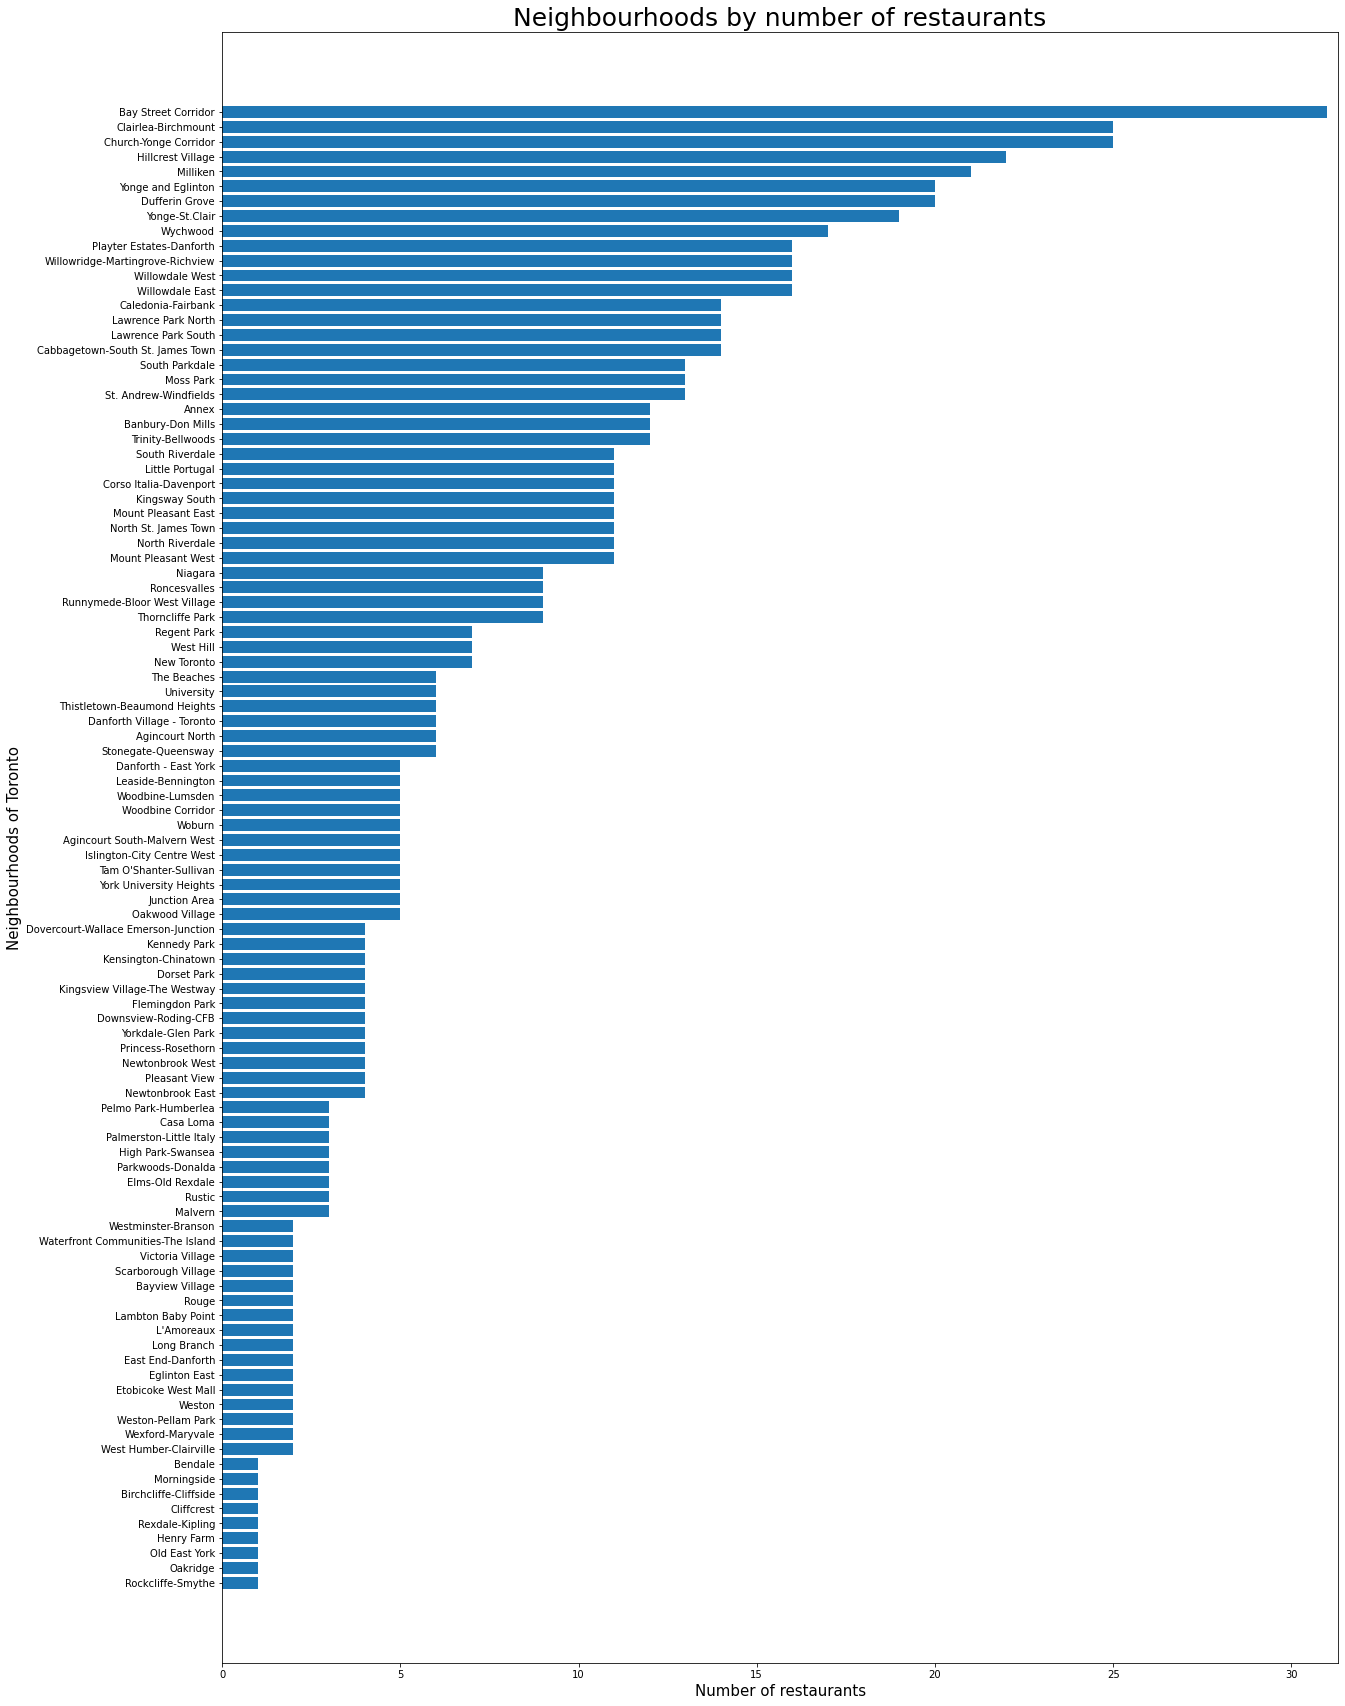

In [295]:
plt.figure(figsize = (20, 30))
plt.margins(0.01, 0.05)
plt.barh(restaurant_sort['Neighbourhood'], restaurant_sort['Total'])
plt.ylabel('Neighbourhoods of Toronto', fontdict = {'fontsize': 15})
plt.xlabel('Number of restaurants', fontdict = {'fontsize': 15})
plt.title('Neighbourhoods by number of restaurants', fontdict = {'fontsize': 25})
plt.show()

In [28]:
restaurant_sort.sort_values(by = 'Total', ascending = False).head(10)

,Neighbourhood,Borough,Total
4,Bay Street Corridor,Old City of Toronto,31
12,Clairlea-Birchmount,Scarborough,25
11,Church-Yonge Corridor,Old City of Toronto,25
28,Hillcrest Village,North York,22
43,Milliken,Scarborough,21
96,Yonge and Eglinton,Old City of Toronto,20
20,Dufferin Grove,Old City of Toronto,20
97,Yonge-St.Clair,Old City of Toronto,19
95,Wychwood,Old City of Toronto,17
91,Willowridge-Martingrove-Richview,Etobicoke,16


Above we have a visual representation of the neighbourhoods with the greatest number of restaurants, and below that a table showing the top ten neighbourhoods in terms of number of restaurants. 

We can also look at the borough with the greatest number of neighbourhoods having restaurants:

In [29]:
restaurant_sort.groupby(['Borough']).count().sort_values(by = 'Total', ascending = False).head(5)

,Neighbourhood,Total
Borough,,
Old City of Toronto,38,38
Scarborough,20,20
North York,19,19
Etobicoke,13,13
East York,5,5


The above shows the neighbourhoods and the boroughs with the greatest number of restaurants. Opening a restaurant in the above locales would likely be successful.

However, it takes more than just the presence of other restaurants to make it successful. We also need to see what type of restaurants are present in each neighbourhood, as it could be be that restaurants of a particular cusine that are successful in certain locales, and opening restaurants of a different type might not be that successful. [Dummies and clusters, with each cluster representing the most popular restaurant type in the neighbourhood]

Another thing to check is the locations of all these restaurants on a map. A cluster of restaurants might indicate a popular food street (where opening a restaurant would certainly be helpful), while an isolated restaurant could indicate the skill of the restauranters, and a new establishment might struggle based on their services. [Map, possible bar chart of ethinicities]

The income of the surrounding neighbourhoods would also be imperative, as a restaurant in an upscale locale would certainly be more expensive than one which isn't in such an upscale neighbourhood. [Income chart]

## Finding the most popular type of restaurant

Of course, there are many different types of restaurants, serving many different kinds of cuisine. We refilter our data to see which cuisines are the most popular:

In [234]:
restype = (
    resturants
    .groupby(['Venue_Category'], as_index = False)
    .agg(Total = ('Venue', 'count'))
    .sort_values('Total', ascending = True)
)

restype.tail()

,Venue_Category,Total
47,Thai Restaurant,47
43,Sushi Restaurant,58
17,Fast Food Restaurant,68
40,Restaurant,70
25,Italian Restaurant,77


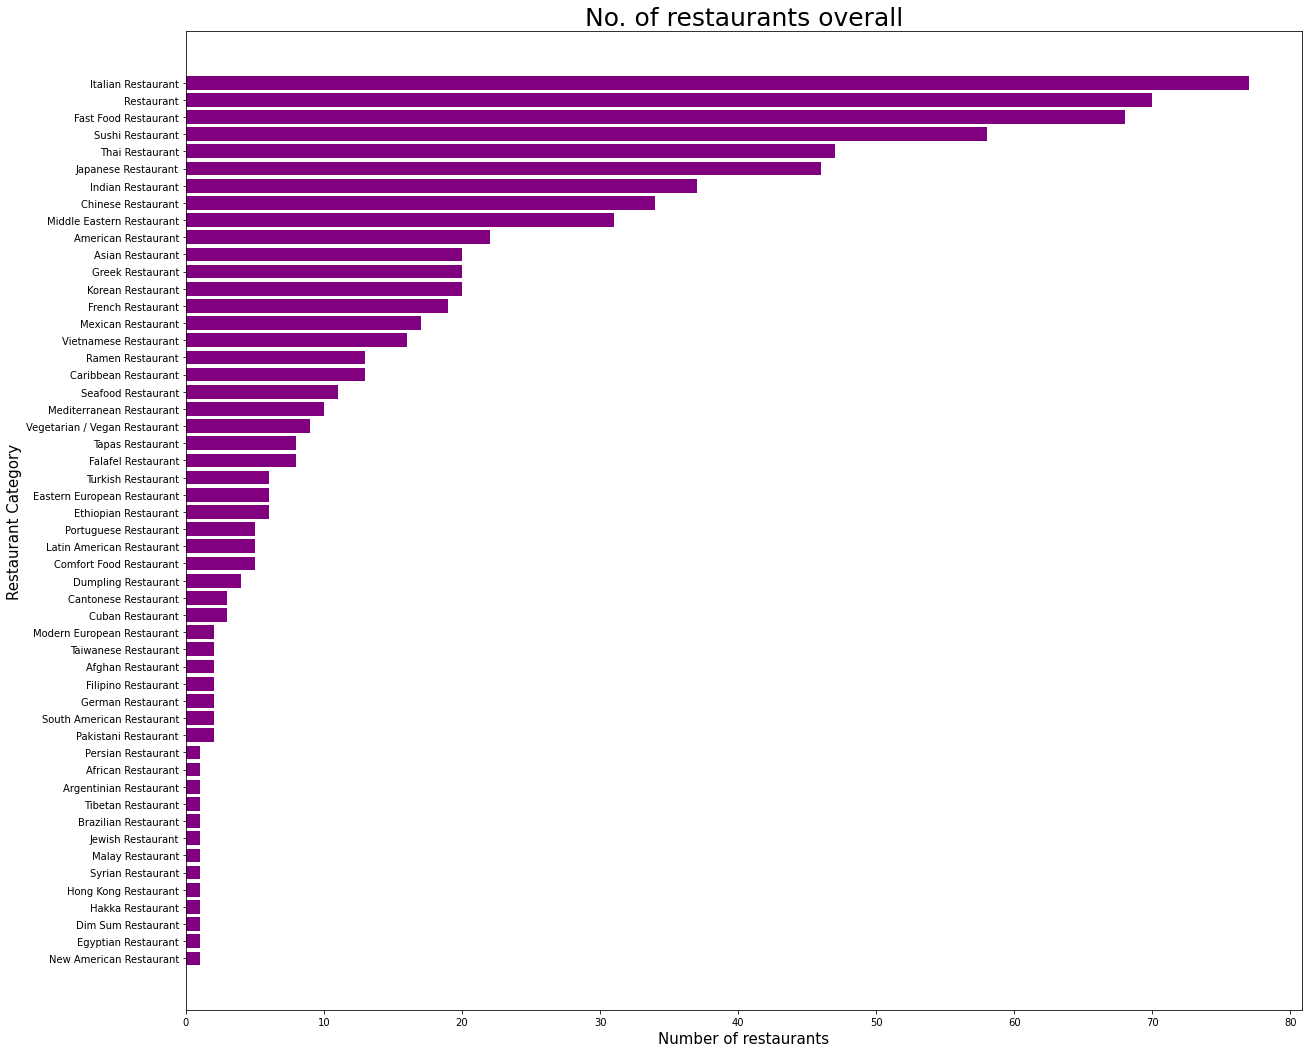

In [301]:
plt.figure(figsize = (20, 18))
plt.barh(restype['Venue_Category'], restype['Total'], color = 'purple')
plt.ylabel('Restaurant Category', fontdict = {'fontsize': 15})
plt.xlabel('Number of restaurants', fontdict = {'fontsize': 15})
plt.title('No. of restaurants overall', fontdict = {'fontsize': 25})
plt.show()

According to the bar chart above, Italian Restaurants are the most popular, followed by restaurants with no particular bent of cuisine. 

## Getting a table of the most popular places for each neighbourhood

I've no clue what we're doing below

In [243]:
vs = 3

res_neighbourhoods = []

for hood in resturants['Neighbourhood'].unique():
    temp = resturants.loc[resturants['Neighbourhood'] == hood][['Venue_Category', 'Neighbourhood']]
    
    raw = temp.groupby('Venue_Category')[['Neighbourhood']].count().sort_values(by = 'Venue_Category', ascending = False).head(vs).reset_index().T
    
    try:
        one = raw.iloc[0,0]
        two = raw.iloc[0,1]
        three = raw.iloc[0,2]
    except IndexError:
        try:
            two = raw.iloc[0,1]
            three = 'None'
        except IndexError:
            try:
                two = 'None'
                three = 'None'
            except Exception as err:
                print(err)
                    
    row = {'Neighbourhood':hood,'1st Most Popular Type':one,'2nd Most Popular Type':two,'3rd Most Popular Type':three}
    res_neighbourhoods.append(row)
                    
popular_restaurants = pd.DataFrame(res_neighbourhoods)  

In [245]:
popular_restaurants.head()

,Neighbourhood,1st Most Popular Type,2nd Most Popular Type,3rd Most Popular Type
0,Agincourt North,Vietnamese Restaurant,Indian Restaurant,Fast Food Restaurant
1,Agincourt South-Malvern West,Restaurant,Japanese Restaurant,None
2,Annex,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant
3,Banbury-Don Mills,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant
4,Bay Street Corridor,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant


In [288]:
poptypeone = popular_restaurants.groupby('1st Most Popular Type').count().sort_values(by = 'Neighbourhood', ascending = True).reset_index()

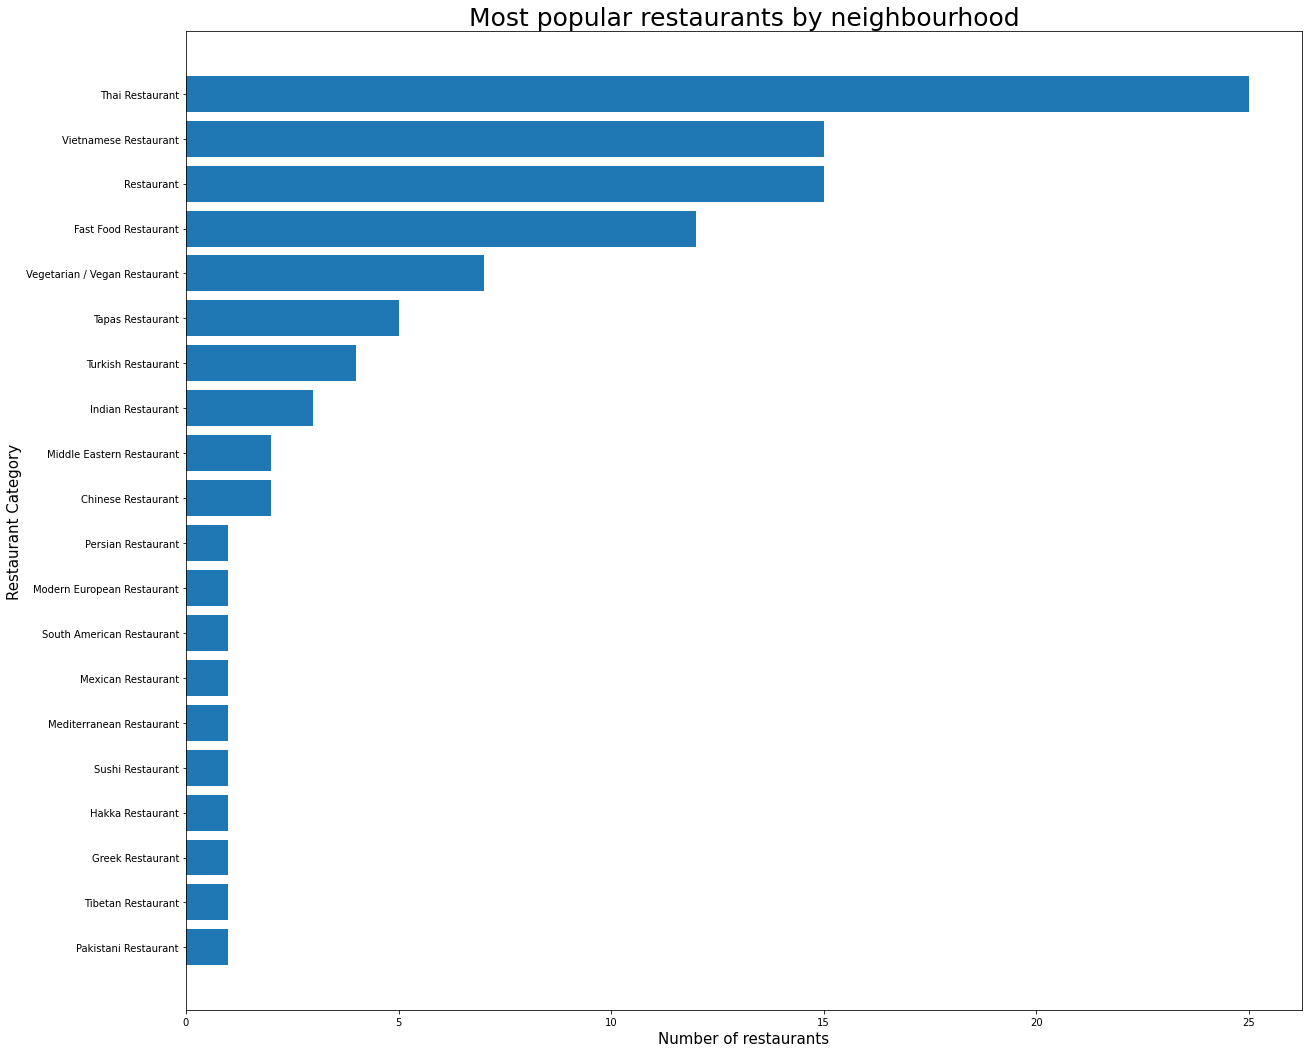

In [297]:
plt.figure(figsize = (20, 18))
plt.barh(poptypeone['1st Most Popular Type'], poptypeone['Neighbourhood'])
plt.ylabel('Restaurant Category', fontdict = {'fontsize': 15})
plt.xlabel('Number of restaurants', fontdict = {'fontsize': 15})
plt.title('Most popular restaurants by neighbourhood', fontdict = {'fontsize': 25})
plt.show()

These results are rather interesting. This shows us that while Italian restaurants are the most populous overall, there are clusters of neighbourhoods where Thai restuarants are the most popularspectively. We can see this more clearly by the shape of the tables:

In [287]:
print('Neighbourhoods with Italian restaurants:', resturants.loc[resturants['Venue_Category'] == 'Italian Restaurant'].shape[0])
print('Neighbourhoods with Thai restaurants:', resturants.loc[resturants['Venue_Category'] == 'Thai Restaurant'].shape[0])

Neighbourhoods with Italian restaurants: 77
Neighbourhoods with Thai restaurants: 47


This shows us that there are 77 neighbourhoods (nearly half of 140) where Italian restaurants are present, and only 47 neighbourhoods where Thai restaurants are present, but also that Thai restaurants are in greater concentration in the neighbourhoods where they are present, versus lesser concentration of Italian restaurants.

## Checking income of each neighbourhood to see what the layout is: